# CLASSIFICATION WITH LOGISTIC REGRESSION

DATASET: IRIS

In [1]:
#IMPORT COMMON LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

### TASK 1

* Read Iris_Data.csv from folder Data
* Check any categorical data and encode to numerical using whichever suitable methods. *Hint* : One-Hot Encode is not suitable for Target. Better to utilize LabelEncoder or custom mapping the class
* Do you think the data need to be scaled? Can check using the min and max of cells in dataframe

In [2]:
# Initializing the dataframe
data = pd.read_csv("iris.csv")

In [3]:
data.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [4]:
#user defined encoding by using replace
data.replace({'species':{'setosa':1, 'versicolor':2, 'virginica':3}}, inplace=True)

In [5]:
#check min and max
data.iloc[:, :-1].min().value_counts()

0.1    1
4.3    1
1.0    1
2.0    1
dtype: int64

In [6]:
data.iloc[:, :-1].max().value_counts()

6.9    1
7.9    1
4.4    1
2.5    1
dtype: int64

In [7]:
# looks like yes, the data need rescaling

### TASK 2

* Split between predictor and target
* Split using StratifiedShuffleSplit to ensure the ratio of every classes presented in the training and testing are fairly distributed
* Scale the data if required. May utilize any suitable scaler


In [8]:
#split between feature and target
X=data.drop('species', axis=1)
y=data.species

# #alternative
# #Prepare the training set
# # X = feature values, all the columns except the last column
# X = data.iloc[:, :-1]
# # y = target values, last column of the data frame
# y = data.iloc[:, -1]

In [9]:
# Splitting to training and testing data
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(X, y))

# Create the dataframes
X_train = data.loc[train_idx, X.columns]
y_train = data.loc[train_idx, 'species']

X_test  = data.loc[test_idx, X.columns]
y_test  = data.loc[test_idx, 'species']

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### TASK 3
* Create Logistic Regression model
* Train the model with training set
* Test the model with testing set
* Print evaluation metrics such as confusion matrix, classification report etc. *Tips*:For multiclassification case, labelbinarize is required to print the AUC

In [11]:
# Import library for Logistic Regression
from sklearn.linear_model import LogisticRegression

# Create a Linear regressor
lr = LogisticRegression()

In [12]:
lr=lr.fit(X_train, y_train)

In [13]:
#Test the model
y_pred = lr.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#CREATE A FUNCTION TO UTILIZE EVALUATION METRICS ON DIFFERENT MODEL
def performance_metrics(y_test, y_pred):
    print( classification_report(y_test, y_pred) )
    auc = roc_auc_score(label_binarize(y_test, classes=[1,2,3]),
              label_binarize(y_pred, classes=[1,2,3]), 
              average='weighted')
    print("AUC Score: %s" %auc)
    cm_lr=confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm_lr, range(3), range(3))
    # plt.figure(figsize=(10,7))
    sns.set(font_scale=1.4) # for label size
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 15}, fmt='d') # font size
    plt.show()

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.80      0.80      0.80        15
           3       0.80      0.80      0.80        15

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45

AUC Score: 0.9


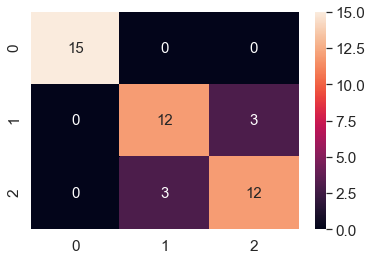

In [16]:
performance_metrics(y_test,y_pred)

### TASK 4

HYPERPARAMETER TUNING
* Define parameters such as solvers, penalty and the c_values and store them as the grid parameters
* Initialize a LogisticRegression model
* Define a cross-validation method. Advised to utilize RepeatedStratifiedKFold from the demo
* Perform GridSearchCV and fit with training set.
* Print the best Parameters

In [17]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [18]:
model=LogisticRegression()

In [19]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [20]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.977879 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.971212 (0.044044) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.971212 (0.044044) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.977879 (0.040157) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.977879 (0.040157) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.977879 (0.040157) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.946667 (0.079209) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.952727 (0.076038) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.952727 (0.076038) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.867273 (0.100648) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.873939 (0.105776) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.873939 (0.105776) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.677879 (0.045738) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.744545 (0.118027) wit

### TASK 6
* Create a Logistic Regression model and assign parameters based on best parameters provided from the GridSearch
* Print the performance of the model.

In [21]:
best_model=LogisticRegression(C=100, penalty='l2', solver='liblinear')

In [22]:
best_model=best_model.fit(X_train, y_train)

In [23]:
y_test_pred_best=best_model.predict(X_test)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.80      0.80      0.80        15
           3       0.80      0.80      0.80        15

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45

AUC Score: 0.9


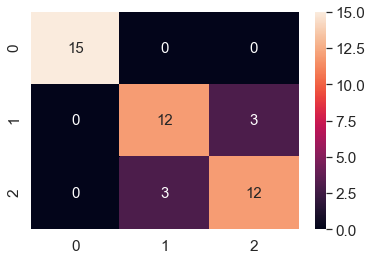

In [24]:
performance_metrics(y_test,y_test_pred_best)